# Modeling Rainfall with the $\gamma$ distribution

# 1. import

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import tensorflow as tf
import pymc as pm
from scipy.stats import gamma
import seaborn as sns
sns.set_context('notebook')

RANDOM_SEED = 20090425
print(pm.__version__)
print(tf.__version__)

5.6.1
2.12.0


## 2. Dataset: Nashville Precipitation

In [2]:
precip = pd.read_table("nashville_precip.txt", index_col=0, na_values='NA', delim_whitespace=True)
precip.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1871,2.76,4.58,5.01,4.13,3.30,2.98,1.58,2.36,0.95,1.31,2.13,1.65
1872,2.32,2.11,3.14,5.91,3.09,5.17,6.10,1.65,4.50,1.58,2.25,2.38
1873,2.96,7.14,4.11,3.59,6.31,4.20,4.63,2.36,1.81,4.28,4.36,5.94
1874,5.22,9.23,5.36,11.84,1.49,2.87,2.65,3.52,3.12,2.63,6.12,4.19
1875,6.15,3.06,8.14,4.22,1.73,5.63,8.12,1.60,3.79,1.25,5.46,4.30


## 3. Data Cleansing 

In [3]:
precip.fillna(value={'Oct': precip.Oct.mean()}, inplace=True)
precip

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1871,2.76,4.58,5.01,4.13,3.30,2.98,1.58,2.36,0.95,1.31,2.13,1.65
1872,2.32,2.11,3.14,5.91,3.09,5.17,6.10,1.65,4.50,1.58,2.25,2.38
1873,2.96,7.14,4.11,3.59,6.31,4.20,4.63,2.36,1.81,4.28,4.36,5.94
1874,5.22,9.23,5.36,11.84,1.49,2.87,2.65,3.52,3.12,2.63,6.12,4.19
1875,6.15,3.06,8.14,4.22,1.73,5.63,8.12,1.60,3.79,1.25,5.46,4.30
...,...,...,...,...,...,...,...,...,...,...,...,...
2007,3.32,1.84,2.26,2.75,3.30,2.37,1.47,1.38,1.99,4.95,6.20,3.83
2008,4.76,2.53,5.56,7.20,5.54,2.21,4.32,1.67,0.88,5.03,1.75,6.72
2009,4.59,2.85,2.92,4.13,8.45,4.53,6.03,2.14,11.08,6.49,0.67,3.99


# 4. Modeling: Part One

<Axes: >

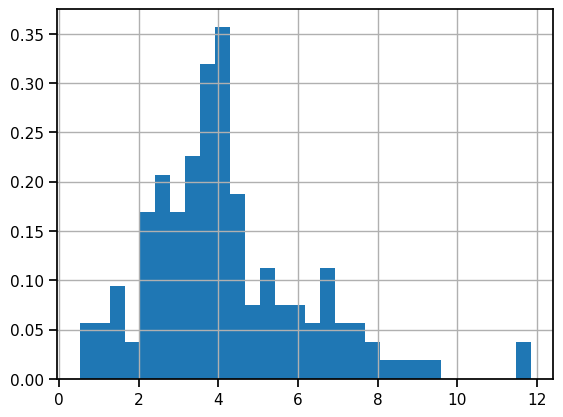

In [4]:
precip.Apr.hist(density=True, bins=30)

as the model is a small one, we can use sample instead of fit to get a more precise answer and we use the newest version of pymc, which is pymc4, called pymc in use

## 4.1 define the function that find the result

In [5]:
def get_model_fit(data,month:str):
    data = np.array(data)
    print(f"fit for month {month}")
    with pm.Model() as rainfall_model:
        
        ualpha = pm.Uniform('ualpha', lower=0, upper=15)
        ubeta = pm.Uniform('ubeta', lower=0, upper=15)

        # observed data
        april_like = pm.Gamma('april_like', alpha=ualpha, beta=ubeta, observed=data)

    # fit model
    with rainfall_model:
        rainfall_trace = pm.sample(1000, tune=500, return_inferencedata=True)

    # mean for ualpha and ubeta
    ualpha_posterior_mean = rainfall_trace.posterior["ualpha"].mean().values
    ubeta_posterior_mean = rainfall_trace.posterior["ubeta"].mean().values
    
    return ualpha_posterior_mean, ubeta_posterior_mean

## 4.2 find parameter for each month and store it in a dictionary

🎄 run the cell below this which have result value, if you don't want to run the fit function

In [6]:
paras_month = {}
for month in precip.columns:
    ualpha_posterior_mean, ubeta_posterior_mean = get_model_fit(precip[month],month)
    paras_month[month] = (ualpha_posterior_mean, ubeta_posterior_mean)

fit for month Jan


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ualpha, ubeta]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 1 seconds.


fit for month Feb


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ualpha, ubeta]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 1 seconds.


fit for month Mar


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ualpha, ubeta]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 1 seconds.


fit for month Apr


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ualpha, ubeta]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 1 seconds.


fit for month May


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ualpha, ubeta]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 1 seconds.


fit for month Jun


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ualpha, ubeta]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 1 seconds.


fit for month Jul


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ualpha, ubeta]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 1 seconds.


fit for month Aug


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ualpha, ubeta]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 1 seconds.


fit for month Sep


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ualpha, ubeta]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 1 seconds.


fit for month Oct


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ualpha, ubeta]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 1 seconds.


fit for month Nov


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ualpha, ubeta]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 1 seconds.


fit for month Dec


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ualpha, ubeta]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 1 seconds.


In [24]:
paras_month

{'Jan': (array(3.29454031), array(0.73032839)),
 'Feb': (array(3.16879888), array(0.77542317)),
 'Mar': (array(4.66288365), array(0.93807205)),
 'Apr': (array(4.36090989), array(1.03924939)),
 'May': (array(3.90927536), array(0.90566904)),
 'Jun': (array(2.97631246), array(0.77018994)),
 'Jul': (array(3.73804909), array(0.96243963)),
 'Aug': (array(3.21386002), array(0.95704875)),
 'Sep': (array(2.1956856), array(0.65291351)),
 'Oct': (array(2.00759632), array(0.77249984)),
 'Nov': (array(3.36307759), array(0.91459521)),
 'Dec': (array(3.5759007), array(0.85713309))}

In [23]:
from numpy import array
paras_month = {'Jan': (array(3.29454031), array(0.73032839)),
 'Feb': (array(3.16879888), array(0.77542317)),
 'Mar': (array(4.66288365), array(0.93807205)),
 'Apr': (array(4.36090989), array(1.03924939)),
 'May': (array(3.90927536), array(0.90566904)),
 'Jun': (array(2.97631246), array(0.77018994)),
 'Jul': (array(3.73804909), array(0.96243963)),
 'Aug': (array(3.21386002), array(0.95704875)),
 'Sep': (array(2.1956856), array(0.65291351)),
 'Oct': (array(2.00759632), array(0.77249984)),
 'Nov': (array(3.36307759), array(0.91459521)),
 'Dec': (array(3.5759007), array(0.85713309))}

## 4.3 plot hist and gamma distribution for April

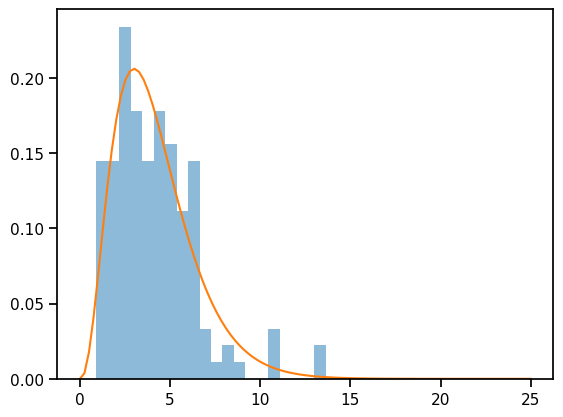

In [9]:
month_percip = precip[month]
ualpha_posterior_mean = paras_month[month][0] 
ubeta_posterior_mean = paras_month[month][1]
plt.hist(month_percip, bins=20, density=True, alpha=0.5)
x = np.linspace(0, 25, 100)
plt.plot(x, gamma.pdf(x, a=ualpha_posterior_mean, scale=1/ubeta_posterior_mean))
plt.show()

# 5. Modeling: Part Two

Simulate all the months.

In [10]:
import warnings
warnings.filterwarnings('ignore')

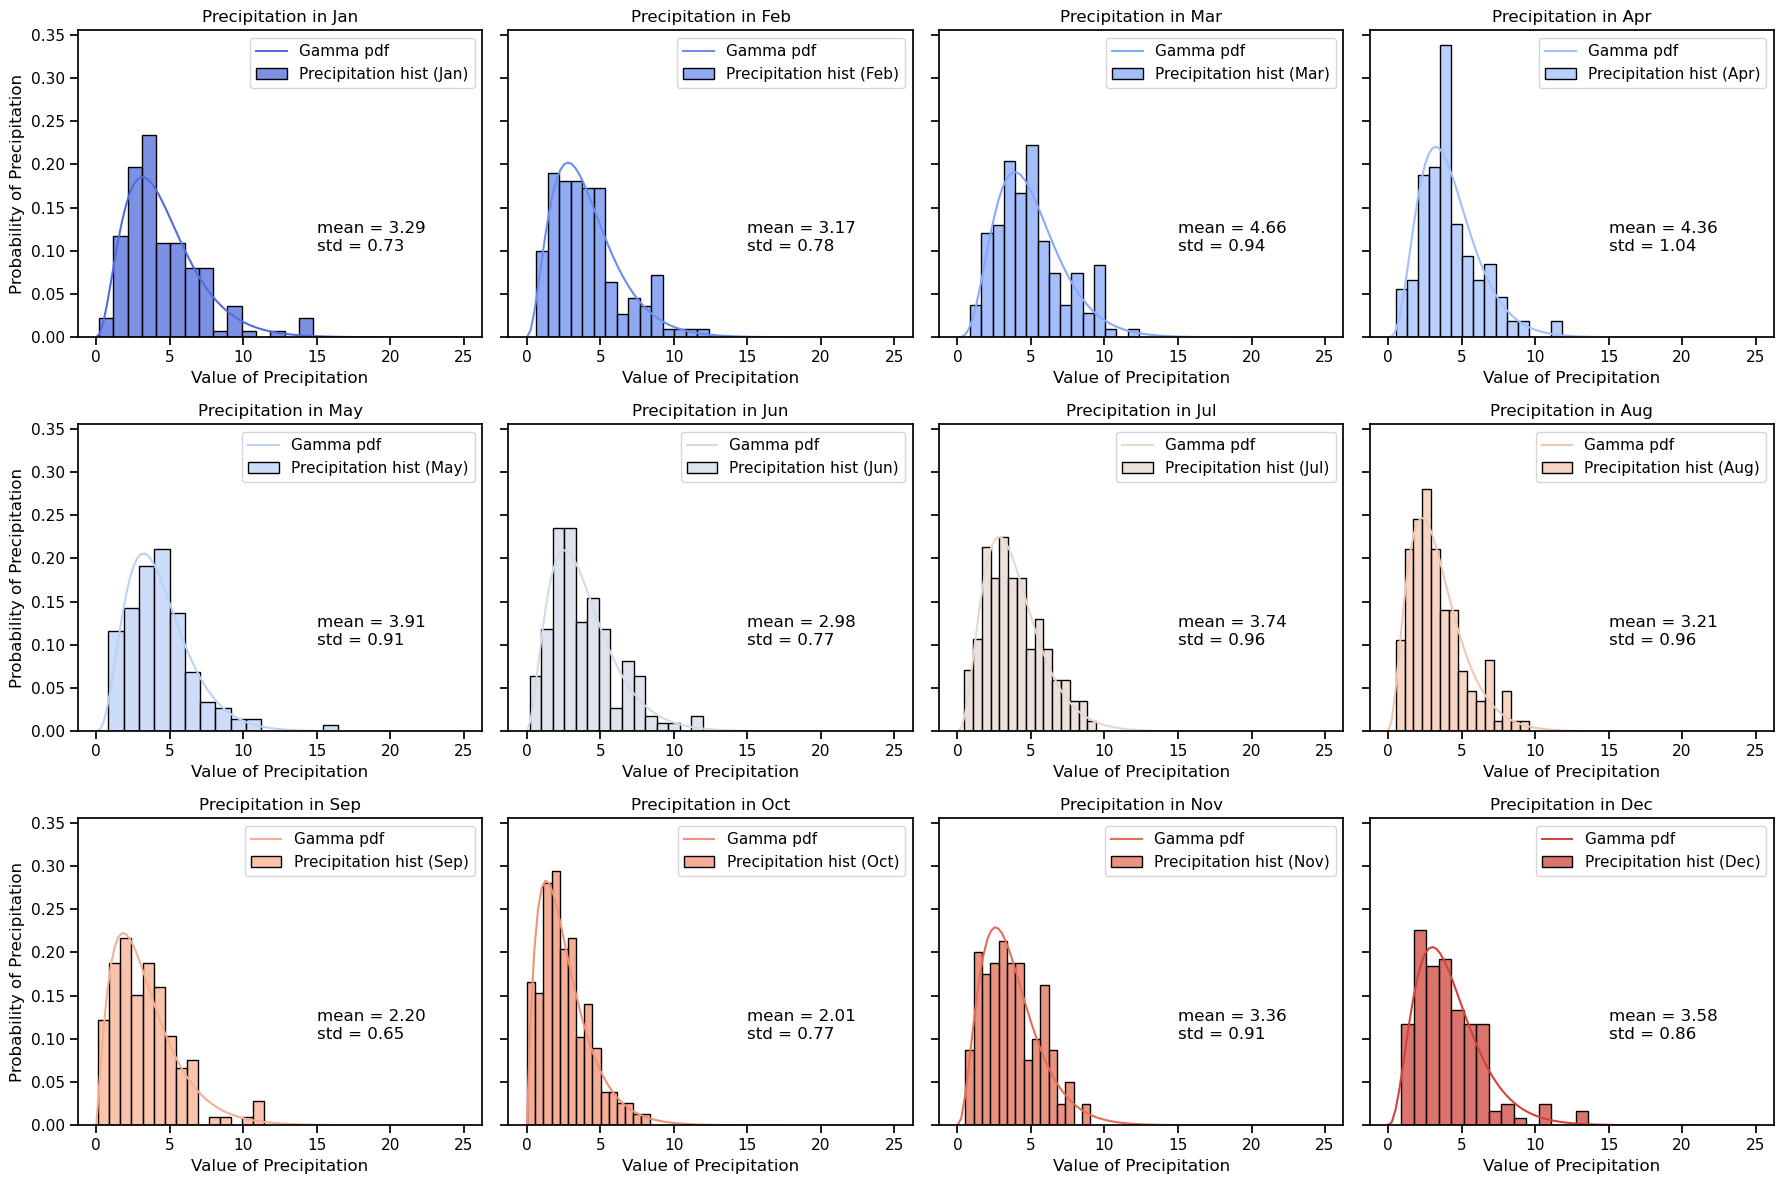

In [42]:
# set value to month and n_months
months = precip.columns
n_months = len(months)

#prepare for plot
color_palette = sns.color_palette("coolwarm", n_colors=n_months)
x = np.linspace(0, 25, 100)
fig, axs = plt.subplots(3, 4, figsize=(18, 12), sharey=True)

for i, month in enumerate(months, start=1):
    ax = axs[(i-1)//4][(i-1)%4]
    # get data,ualpha,ubeta for each month
    data = precip[month]
    ualpha = paras_month[month][0] 
    ubeta = paras_month[month][1]
    
    # plot
    sns.histplot(data, kde=False, color=color_palette[i - 1], label=f"Precipitation hist ({month})", bins=15, stat="density",ax=ax)
    pdf = gamma.pdf(x, a=ualpha, scale=1/ubeta)
    sns.lineplot(x=x, y=pdf, label="Gamma pdf", color=color_palette[i - 1],ax=ax)
    
    # add title
    ax.set_title(f'Precipitation in {month}')
    ax.set_xlabel('Value of Precipitation')
    ax.set_ylabel('Probability of Precipitation')
    label = 'mean = {0:.2f}\nstd = {1:.2f}'.format(ualpha, ubeta)
    ax.annotate(label, xy=(15, 0.10))
    ax.legend(loc="upper right")

plt.tight_layout()
plt.show()